# Evaluate depth inference on EuRoC MAV dataset

Instead of official [ethz-asl host location](https://projects.asl.ethz.ch/datasets/doku.php?id=kmavvisualinertialdatasets) we use alternate [google drive location](https://drive.google.com/drive/folders/1_kwqHojvBusHxilcclqXh6haxelhJW0O) by MIT-Spark lab as official server is too slow and gdrive can be used to download single image for inference instead of entire dataset 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

In [7]:
machine_hall_frame_id='1403636737313555456'
machine_hall_base_dir='/Volumes/external/workspace/datasets/MH_01_easy'
vicon_frame_id='1413393300955760384'
vicon_base_dir='/Volumes/external/workspace/datasets/V2_01_easy/mav0/cam0/data'

def get_dmap(path):
    return np.squeeze(np.load(path))
def get_rgb(path):
    return cv.cvtColor(cv.imread(path), cv.COLOR_BGR2RGB)

def plot_rgb_and_d(image, dmap):
    plt.subplot(2, 1, 1)
    plt.title('inference image')
    plt.imshow(image)
    plt.subplot(2, 1, 2)
    plt.title('depth image')
    plt.imshow(dmap, cmap='gray')
    plt.show()

def plot_frame_results(dataset_base_dir, img_id):
    plot_rgb_and_d(get_rgb('{}/{}.png'.format(dataset_base_dir, img_id)), 
                   get_dmap('../data/{}_depth.npy'.format(img_id)))

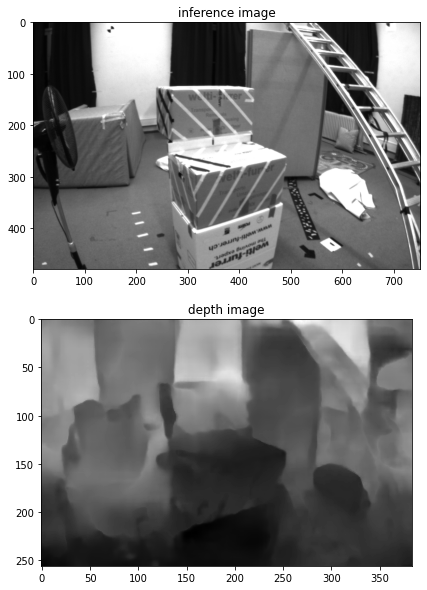

In [5]:
plot_frame_results(vicon_base_dir, vicon_frame_id)

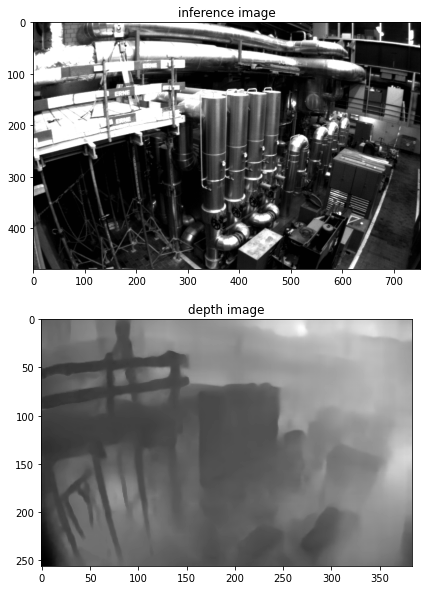

In [6]:
plot_frame_results(machine_hall_base_dir, machine_hall_frame_id)

## Conclusion
Model was trained on machine hall. Inference on same sequence is good while on different sequence seems bad. Same can be observed in original paper depth metric ie. Table 4 where abs rel. on euroc mav is 33.2% while Kitti is only 12%. fancy qualitative results in Fig. 7 are trained on entire dataset and inferred on same. This is fundamentally wrong.